In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col='Unnamed: 0')
df.head()

In [ ]:
df.info()

In [ ]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

In [ ]:
df['_STATE'].unique() #find unique values

In [ ]:
df['PHYSHLTH'].describe()

In [ ]:
df["PHYSHLTH"].value_counts()

In [ ]:
df['PHYSHLTH']


In [ ]:
df['PHYSHLTH'].replace(88.0, 0, inplace=True)
df['PHYSHLTH'].replace([77, 99], np.nan, inplace=True)


In [ ]:
df['PHYSHLTH']  #Make sure the replace worked 

In [ ]:
df.groupby('_STATE')['PHYSHLTH'].mean()  #find the mean by state so that the data remains true as possible 

In [12]:
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [13]:
# loop to go through the dataframe and replace the NONE in PHYSHLTH columns to the corresponding mean by state.
for ele in df['_STATE']:
    if ele == '9':
        if df['PHYSHLTH'][ele] is None:
            df['PHYSHLTH'][ele] = 3.697
    elif ele == '34':
        if df['PHYSHLTH'][ele] is None:
            df['PHYSHLTH'][ele] = 4.366
    elif ele == '36':
        if df['PHYSHLTH'][ele] is None:
            df['PHYSHLTH'][ele] = 4.145

In [14]:
df['PHYSHLTH'].describe() #to get descriptive stats on the coloumn



count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

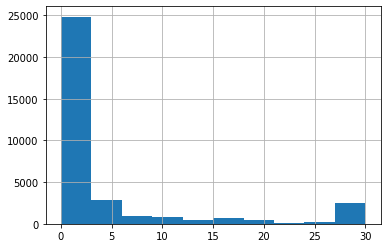

In [15]:
df['PHYSHLTH'].hist() #histogram to show the data 


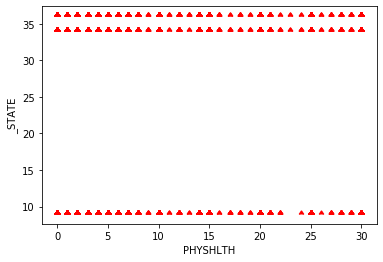

In [16]:
# y_val = df['_STATE'].value_counts()
# print(y_val.keys())
df.plot.scatter(x='PHYSHLTH',y='_STATE',marker = 10 , c ='r' )  #Scatter plot to show the data 


In [17]:
my_graph_state = df.groupby('_STATE')['PHYSHLTH'].mean() #groupby state

In [18]:
my_graph_state

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

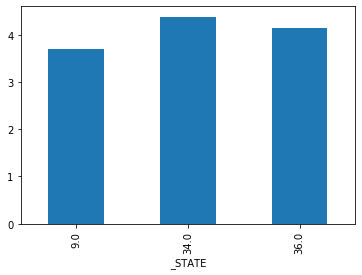

In [19]:
my_graph_state.plot(kind = 'bar')

In [20]:
for s in df['PHYSHLTH']:
    if s >= 30:
        df['CHRNC_SCK'] = s
df['CHRNC_SCK']

49938     30.0
49939     30.0
49940     30.0
49941     30.0
49942     30.0
          ... 
303774    30.0
303775    30.0
303776    30.0
303777    30.0
303778    30.0
Name: CHRNC_SCK, Length: 34545, dtype: float64

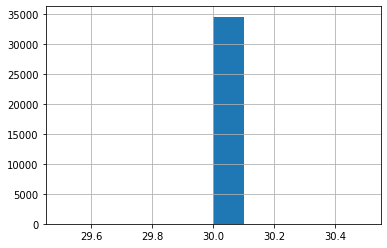

In [21]:
df['CHRNC_SCK'].hist( )